Project8 - Employee Attrition Analysis

Name - Rishabh

(4410, 29)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4410 non-null   int64  
 1   Age                      4410 non-null   int64  
 2   Attrition                4410 non-null   object 
 3   BusinessTravel           4410 non-null   object 
 4   Department               4410 non-null   object 
 5   DistanceFromHome         4410 non-null   int64  
 6   Education                4410 non-null   int64  
 7   EducationField           4410 non-null   object 
 8   EmployeeCount            4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesW

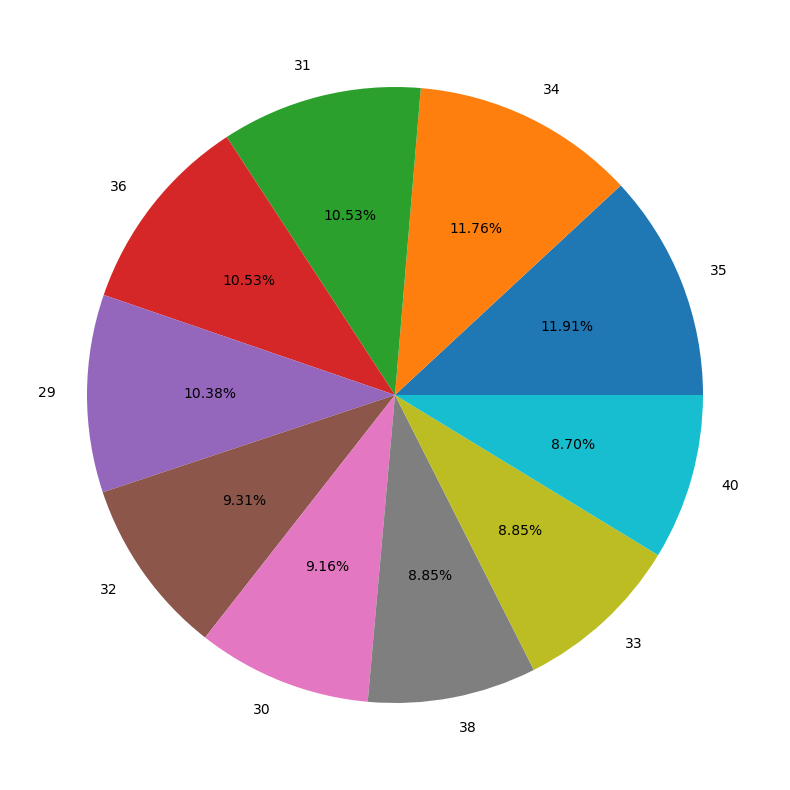

Sales Executive              978
Research Scientist           876
Laboratory Technician        777
Manufacturing Director       435
Healthcare Representative    393
Manager                      306
Sales Representative         249
Research Director            240
Human Resources              156
Name: JobRole, dtype: int64
******************************
Married     2019
Single      1410
Divorced     981
Name: MaritalStatus, dtype: int64
******************************
Y    4410
Name: Over18, dtype: int64
******************************
EmployeeID                  0
Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18    

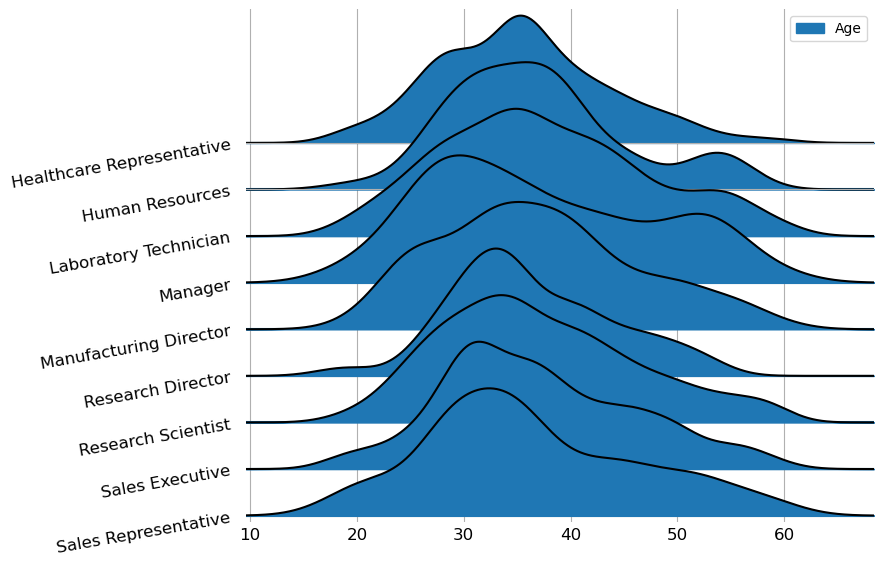

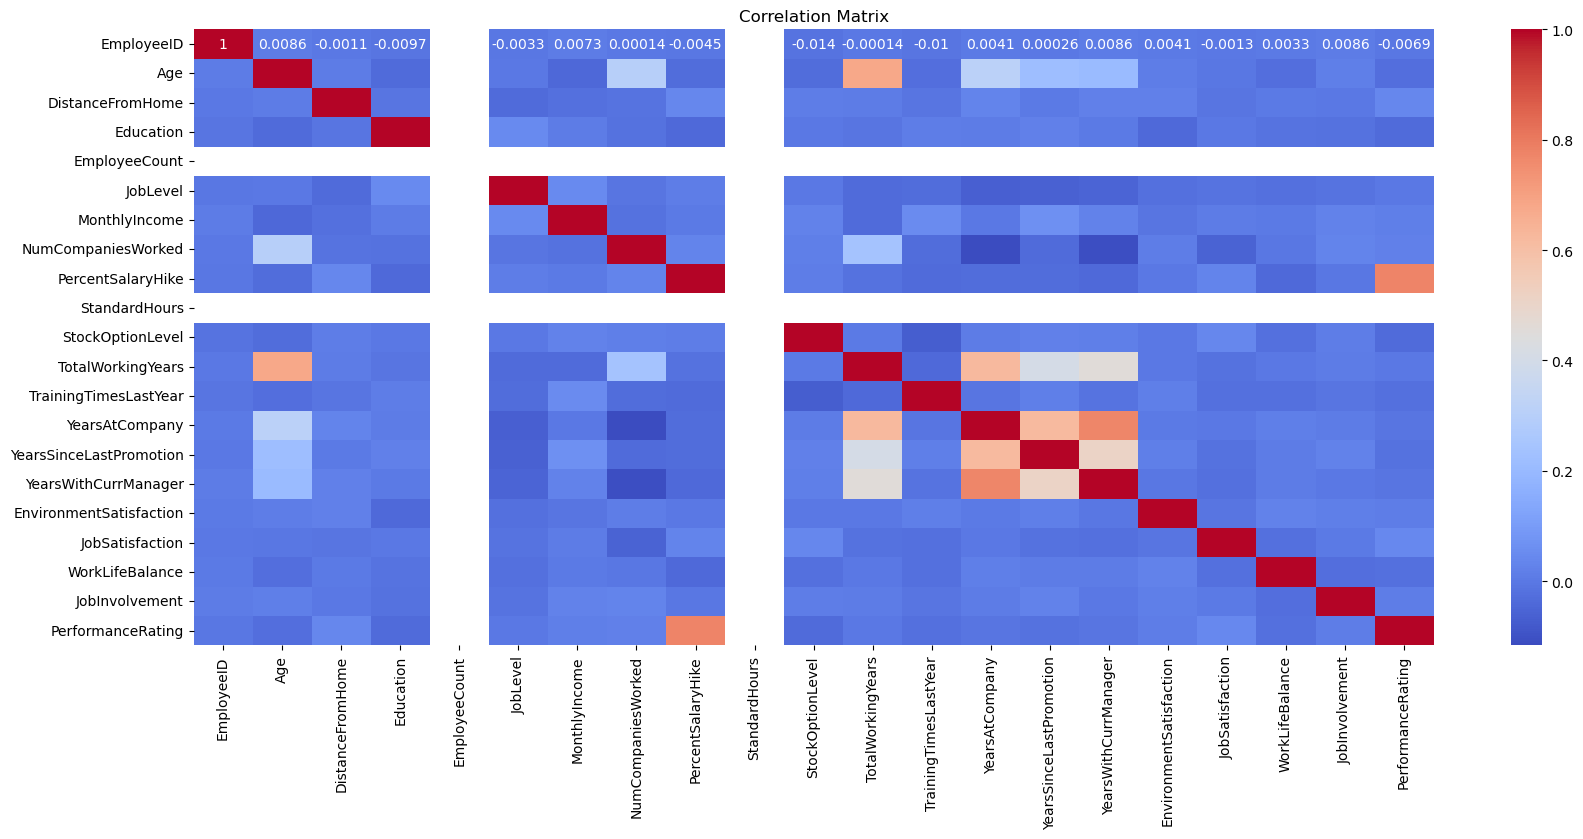

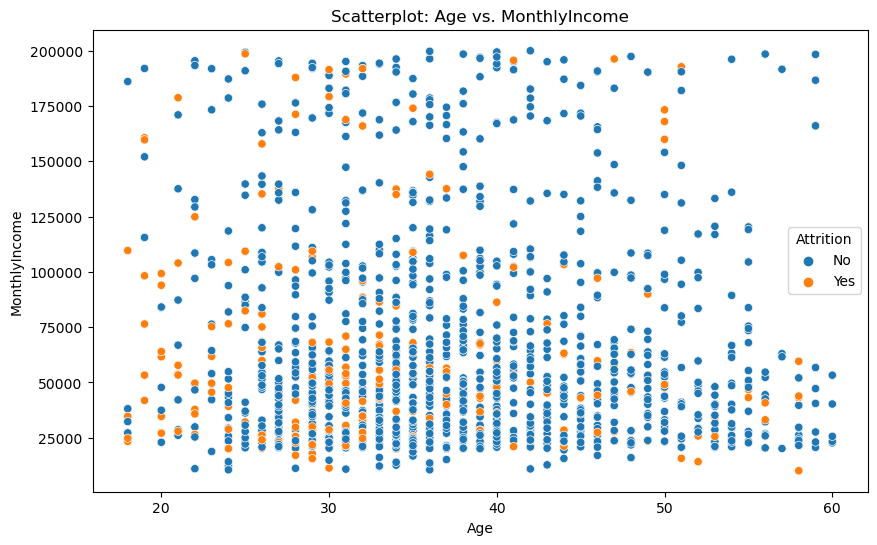

16.122448979591837
No     3699
Yes     711
Name: Attrition, dtype: int64


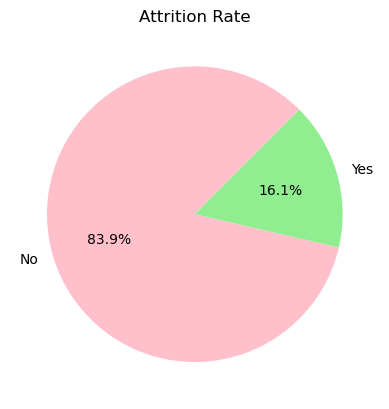

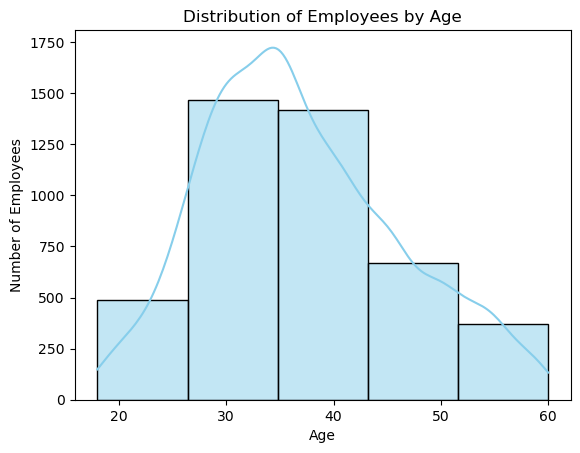

Attrition       No  Yes
Age_category           
Young          858  300
Adult         2466  357
Senile         375   54


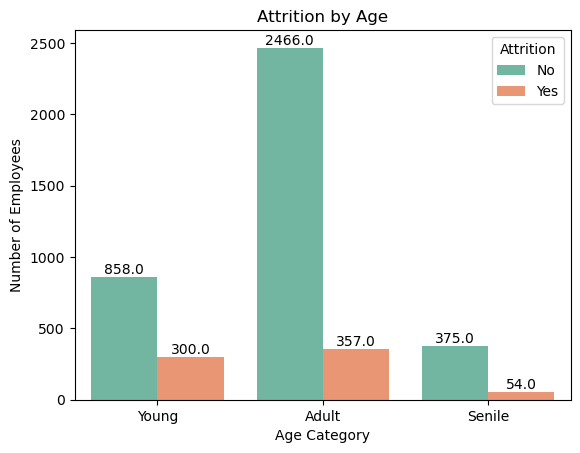

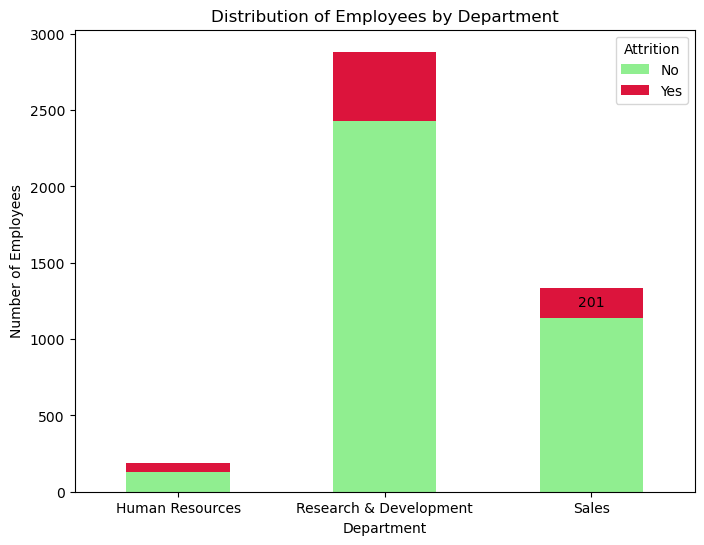

               Department  TotalEmployees  AttritionCount  AttritionPercentage
0         Human Resources             189              57            30.158730
1  Research & Development            2883             453            15.712799
2                   Sales            1338             201            15.022422


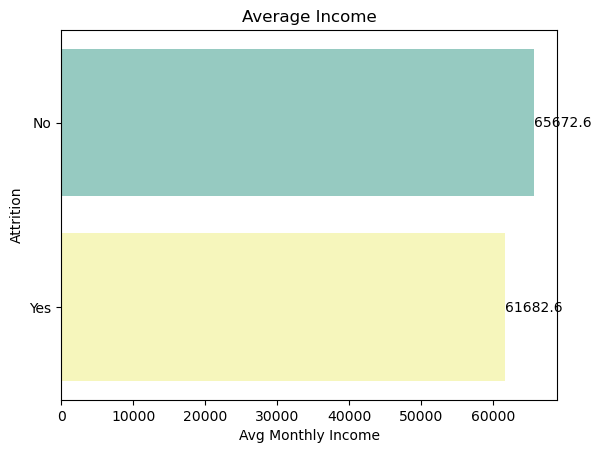

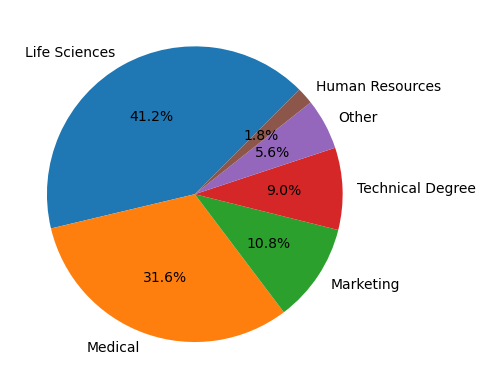

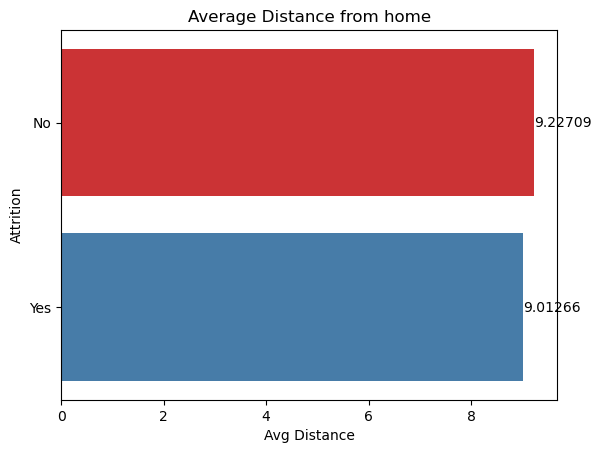

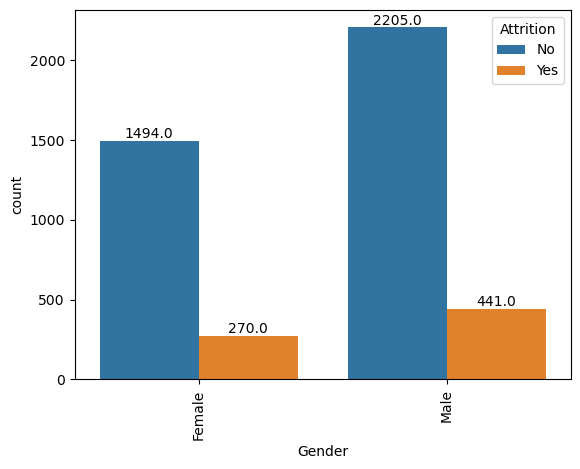

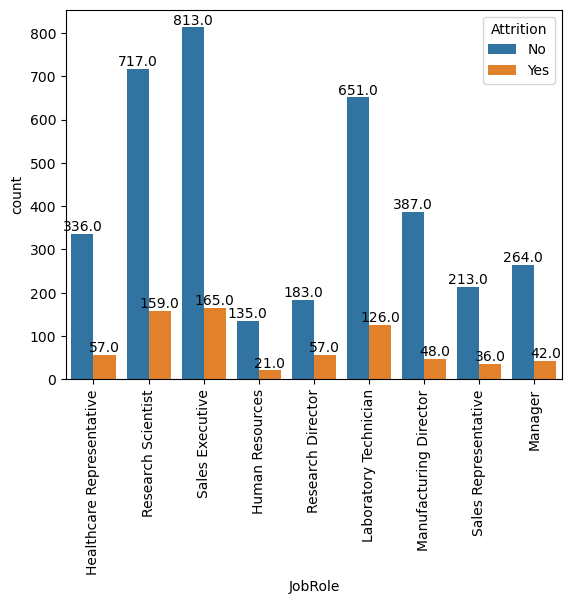

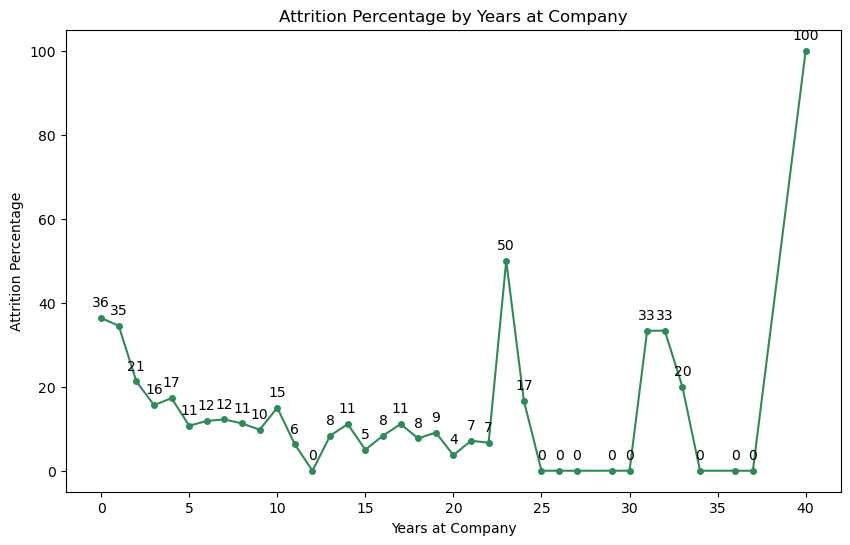

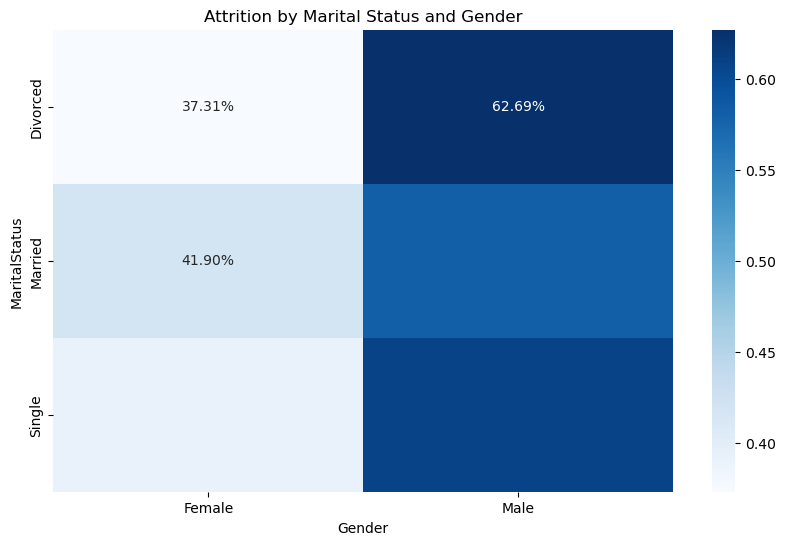

12.481426448736999


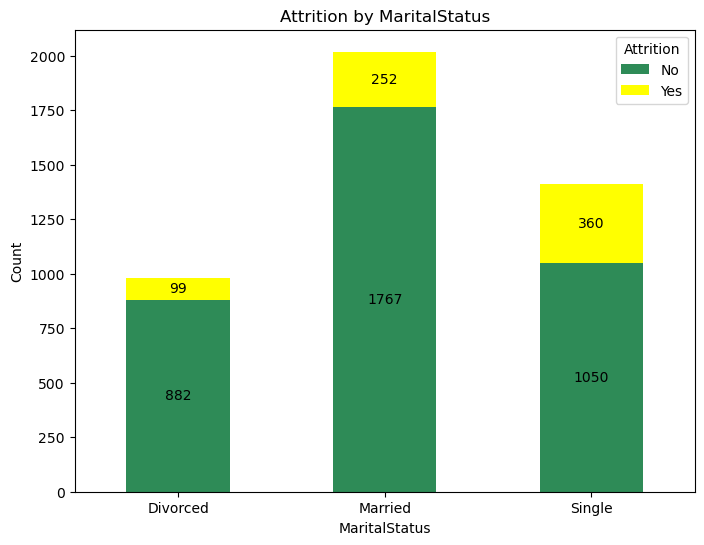

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
import warnings
import joypy

file = pd.read_csv('D:/Unified mentor projects/Employee Attrition Analysis/Attrition data.csv')
def preprocessing(file):
    
    print(file.shape)
    print(file.info())
    print(file.duplicated().sum())
    file['Attrition']=file['Attrition'].astype('category')
    file['BusinessTravel']=file['BusinessTravel'].astype('category')
    file['Department']=file['Department'].astype('category')
    file['EducationField']=file['EducationField'].astype('category')
    file['Gender']=file['Gender'].astype('category')
    print(file.info())
    gend_dist=file['Gender'].value_counts()
    print(gend_dist)
    Age_name=file.Age.value_counts().index 
    Age_val=file.Age.value_counts().values
    fig,ax=plt.subplots(figsize=(10,10))
    ax.pie(Age_val[:10],labels=Age_name[:10],autopct='%1.2f%%')
    plt.show()
    for i in file.select_dtypes(include="object").columns:
        print(file[i].value_counts())
        print("***"*10)   
    print(file.isnull().sum())    
    df=file.fillna(value=0)#removing null values
    print(df.isnull().sum()) #checking for null values
    joypy.joyplot(file,column=['Gender','Age'],by='JobRole',figsize=(9,6),xlabelsize=12,ylim='own',ylabelsize=12,grid='both',yrot=10,fill=True,legend=True,overlap=2)
    plt.show()
    return df
def analyse(df):
    correlation_matrix = df.corr(numeric_only=True)
    plt.figure(figsize=(20, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
    plt.title('Correlation Matrix')
    plt.show()
     
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='Age', y='MonthlyIncome', data=df, hue='Attrition')
    plt.title('Scatterplot: Age vs. MonthlyIncome')
    plt.show()
     
    attrition_rate=((df[df['Attrition']=='Yes'].count()[0])/df.shape[0])*100
    print(attrition_rate)
    attrition_counts = df['Attrition'].value_counts()
    print(attrition_counts)
    plt.pie(attrition_counts, labels=attrition_counts.index,autopct='%1.1f%%', startangle=45, colors=['pink','lightgreen'])
    plt.title('Attrition Rate')
    plt.show()
    
    sns.histplot(data= df, x= 'Age', bins= 5, color= 'skyblue', kde=True)
    plt.ylabel('Number of Employees')
    plt.title('Distribution of Employees by Age')
    plt.show()
    
    bins= [10,30,50,np.inf]
    values= ['Young', 'Adult', 'Senile']
    df['Age_category']= pd.cut(df['Age'], bins=bins,labels=values)
    attrition_age=df.pivot_table(index='Age_category',columns='Attrition',values='EmployeeID',aggfunc='count')
    print(attrition_age)
    
    m=sns.countplot(data= df,x= 'Age_category', hue='Attrition',palette='Set2')
    plt.xticks(rotation=0)
    plt.xlabel('Age Category')
    plt.ylabel('Number of Employees')
    plt.title('Attrition by Age')
    for p in m.patches:
        height = p.get_height()
        m.annotate(f'{height}', (p.get_x() + p.get_width() / 2, height),
                    ha='center', va='bottom', fontsize=10)
    plt.show()


    attrition_by_department = df.groupby(['Department', 'Attrition']).size().unstack()                 # Create a stacked bar chart
    ax = attrition_by_department.plot(kind='bar', stacked=True, figsize=(8, 6),color=['lightgreen','crimson'])
    plt.legend(title='Attrition', loc='upper right')
    plt.xticks(rotation=0)
    plt.xlabel('Department')
    plt.ylabel('Number of Employees')
    plt.title('Distribution of Employees by Department')
    m.bar_label(m.containers[0], fontsize=10)
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()
    ax.annotate(f'{int(height)}', (x + width/2, y + height/2), ha='center', va='center')
    plt.show()
    
    department_groups = df.groupby('Department')
    total_employees_by_department = department_groups.size().reset_index(name='TotalEmployees')
    attrition_count_by_department = department_groups['Attrition'].apply(lambda x: (x == 'Yes').sum()).reset_index(name='AttritionCount')
    attrition_percentage_by_department = pd.merge(total_employees_by_department, attrition_count_by_department, on='Department')
    attrition_percentage_by_department['AttritionPercentage'] = (attrition_percentage_by_department['AttritionCount'] / attrition_percentage_by_department['TotalEmployees']) * 100
    print(attrition_percentage_by_department)
    
    avg_distance=df.groupby('Attrition')['DistanceFromHome'].mean()
    avg_income=df.groupby('Attrition')['MonthlyIncome'].mean()
    p=sns.barplot(data=df, y= avg_income.index, x=avg_income.values,errorbar=None,palette="Set3")
    p.bar_label(p.containers[0], fontsize=10)
    plt.title('Average Income')
    plt.xlabel('Avg Monthly Income')
    plt.show()
    
    edu_dist=df['EducationField'].value_counts()
    plt.pie(edu_dist, labels=edu_dist.index,autopct='%1.1f%%', startangle=45)
    plt.show()
    
    p=sns.barplot(data=df, y= avg_distance.index, x=avg_distance.values,errorbar=None,palette="Set1")
    p.bar_label(p.containers[0], fontsize=10)
    plt.title('Average Distance from home')
    plt.xlabel('Avg Distance')
    plt.show()
    
    m=sns.countplot(data=df, x='Gender', hue='Attrition')
    plt.xticks(rotation=90)
    for p in m.patches:
        height = p.get_height()
        m.annotate(f'{height}', (p.get_x() + p.get_width() / 2, height),
                    ha='center', va='bottom', fontsize=10)
    plt.show()
    
    jp=sns.countplot(data=df, x='JobRole', hue='Attrition')
    plt.xticks(rotation=90)
    for p in jp.patches:
        height = p.get_height()
        jp.annotate(f'{height}', (p.get_x() + p.get_width() / 2, height),
                    ha='center', va='bottom', fontsize=10)
    plt.show()
    
    attrition_by_years = df.groupby('YearsAtCompany')['Attrition'].apply(lambda x: (x == 'Yes').mean() * 100)
    plt.figure(figsize=(10, 6))
    plt.plot(attrition_by_years.index, attrition_by_years.values, marker='o', linestyle='-',markersize=4,color='seagreen')
    plt.title('Attrition Percentage by Years at Company')
    plt.xlabel('Years at Company')
    plt.ylabel('Attrition Percentage')
    label_offset = 2  # Adjust this value to control label height
    for x, y in zip(attrition_by_years.index, attrition_by_years.values):
        label = f'{int(round(y))}'  # Round the percentage and convert it to an integer
        plt.text(x, y + label_offset, label, ha='center', va='bottom', fontsize=10)
    plt.show()
    
    cross_tab = pd.crosstab(df['MaritalStatus'], df['Gender'], values=df['Attrition'], aggfunc='count', normalize='index')
    plt.figure(figsize=(10, 6))
    sns.heatmap(cross_tab, annot=True, cmap='Blues', fmt=".2%", cbar=True)
    plt.title('Attrition by Marital Status and Gender')
    plt.show()

def main():
    path="D:/Unified mentor projects/Employee Attrition Analysis/Attrition data.csv"
    warnings.filterwarnings("ignore")
    df=pd.read_csv(path)
   
    df = preprocessing(file)
    analyse(df)
    
    total_employees_with_Ms = df[df['MaritalStatus'] == 'Married']['EmployeeID'].count()
    Ms_and_left = df[(df['MaritalStatus'] == 'Married') & (df['Attrition'] == 'Yes')]['EmployeeID'].count()
    percentage_left_with_Ms = (Ms_and_left / total_employees_with_Ms) * 100
    print(percentage_left_with_Ms)
    attrition_by_Ms = df.groupby(['MaritalStatus', 'Attrition']).size().unstack()
    ax = attrition_by_Ms.plot(kind='bar', stacked=True, figsize=(8, 6),color=['seagreen','yellow'])
    plt.title('Attrition by MaritalStatus')
    plt.xlabel('MaritalStatus')
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    plt.legend(title='Attrition', loc='upper right')
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()
        ax.annotate(f'{int(height)}', (x + width/2, y + height/2), ha='center', va='center')
    plt.show()
if __name__== "__main__":
    main()